## Mini Project III

In [60]:
import pandas as pd
import numpy as np
# Ben cleans:
accounts_df = pd.read_csv('data/twm_accounts.csv', sep=';')
checking_acct_df = pd.read_csv('data/twm_checking_acct.csv', sep=';')
checking_tran_df = pd.read_csv('data/twm_checking_tran.csv', sep=';')
credit_acct_df = pd.read_csv('data/twm_credit_acct.csv', sep=';')
credit_tran_df = pd.read_csv('data/twm_credit_tran.csv', sep=';')

# Brittany cleans:
customer_df = pd.read_csv('data/twm_customer.csv', sep=';')
savings_acct_df = pd.read_csv('data/twm_savings_acct.csv', sep=';')
savings_tran_df = pd.read_csv('data/twm_savings_tran.csv', sep=';')
transactions_df = pd.read_csv('data/twm_transactions.csv', sep=';')

In [2]:
print(accounts_df.shape, checking_acct_df.shape, checking_tran_df.shape, credit_acct_df.shape, credit_tran_df.shape, customer_df.shape, savings_acct_df.shape, savings_tran_df.shape, transactions_df.shape, sep='\n')

(1409, 8)
(520, 9)
(46204, 10)
(468, 9)
(20167, 10)
(747, 15)
(421, 9)
(11189, 10)
(77580, 10)


## Accounts DF Cleaning

In [61]:
accounts_df.head(10)

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28
5,4561143213631020,1363102,CC,Y,30.11.1995,NaN,0.00,1000.00
6,4561143213633270,1363327,CC,Y,2.4.1995,NaN,0.00,3000.00
7,13628972,1362897,CK,Y,1.8.1995,NaN,152.12,52.33
8,4561143213632370,1363237,CC,N,24.1.1993,30.1.1995,8649.37,0.00
9,13627202,1362720,CK,Y,14.11.1995,NaN,1074.16,216.74


In [73]:
accounts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   acct_nbr          1409 non-null   int64         
 1   cust_id           1409 non-null   int64         
 2   acct_type         1409 non-null   object        
 3   account_active    1409 non-null   object        
 4   acct_start_date   1409 non-null   datetime64[ns]
 5   acct_end_date     143 non-null    datetime64[ns]
 6   starting_balance  1409 non-null   float64       
 7   ending_balance    1409 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(2), object(2)
memory usage: 88.2+ KB


In [63]:
accounts_df.describe()

,acct_nbr,cust_id,starting_balance,ending_balance
count,1.409000e+03,1.409000e+03,1409.00000,1409.000000
mean,1.514986e+15,1.362989e+06,1435.35357,1011.754336
std,2.148991e+15,2.940584e+02,2186.69662,1559.986310
min,1.362480e+07,1.362480e+06,0.00000,0.000000
25%,1.362852e+07,1.362727e+06,189.23000,140.000000
50%,1.363252e+07,1.362985e+06,487.69000,553.610000
75%,4.561143e+15,1.363251e+06,2178.79000,1188.570000
max,4.561143e+15,1.363495e+06,27072.38000,22432.780000


In [68]:
# Convert dates to date format
accounts_df['acct_start_date']= pd.to_datetime(accounts_df['acct_start_date'], format='%d.%m.%Y')
accounts_df['acct_end_date'] = pd.to_datetime(accounts_df['acct_end_date'], format='%d.%m.%Y')
accounts_df.head(10)

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,1995-12-10,NaT,1430.22,284.58
1,4561143213627090,1362709,CC,Y,1993-03-15,NaT,266.34,496.15
2,4561143213628360,1362836,CC,Y,1992-03-18,NaT,55.90,1000.00
3,13633112,1363311,CK,Y,1995-07-06,NaT,11017.13,968.46
4,4561143213633610,1363361,CC,Y,1994-06-17,NaT,849.37,462.28
5,4561143213631020,1363102,CC,Y,1995-11-30,NaT,0.00,1000.00
6,4561143213633270,1363327,CC,Y,1995-04-02,NaT,0.00,3000.00
7,13628972,1362897,CK,Y,1995-08-01,NaT,152.12,52.33
8,4561143213632370,1363237,CC,N,1993-01-24,1995-01-30,8649.37,0.00
9,13627202,1362720,CK,Y,1995-11-14,NaT,1074.16,216.74


In [65]:
accounts_df.isna().sum()

acct_nbr               0
cust_id                0
acct_type              0
account_active         0
acct_start_date        0
acct_end_date       1266
starting_balance       0
ending_balance         0
dtype: int64

In [97]:
# dummy variables for acct_type
type_df = accounts_df['acct_type']
df_dummy = pd.get_dummies(type_df)
df_dummy

,CC,CK,SV
0,False,False,True
1,True,False,False
2,True,False,False
3,False,True,False
4,True,False,False
...,...,...,...
1404,True,False,False
1405,True,False,False
1406,True,False,False
1407,False,False,True


In [99]:
accounts_df = pd.concat([accounts_df, df_dummy], axis=1)
accounts_df.head()

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,CC,CK,SV
0,13628063,1362806,SV,Y,1995-12-10,NaT,1430.22,284.58,False,False,True
1,4561143213627090,1362709,CC,Y,1993-03-15,NaT,266.34,496.15,True,False,False
2,4561143213628360,1362836,CC,Y,1992-03-18,NaT,55.90,1000.00,True,False,False
3,13633112,1363311,CK,Y,1995-07-06,NaT,11017.13,968.46,False,True,False
4,4561143213633610,1363361,CC,Y,1994-06-17,NaT,849.37,462.28,True,False,False


In [101]:
accounts_df.drop(columns=['acct_type'], inplace=True)

In [91]:
# convert account_active to numeric
accounts_df['account_active'] = accounts_df['account_active'].astype(str)

In [96]:

accounts_df['account_active'].value_counts()

account_active
Y     1266
N      143
Name: count, dtype: int64

In [107]:
active_dict = {'Y ': 1, 'N ': 0}
accounts_df['account_active'] = accounts_df['account_active'].map(active_dict)

In [109]:
accounts_df['account_active'].value_counts()

account_active
1    1266
0     143
Name: count, dtype: int64

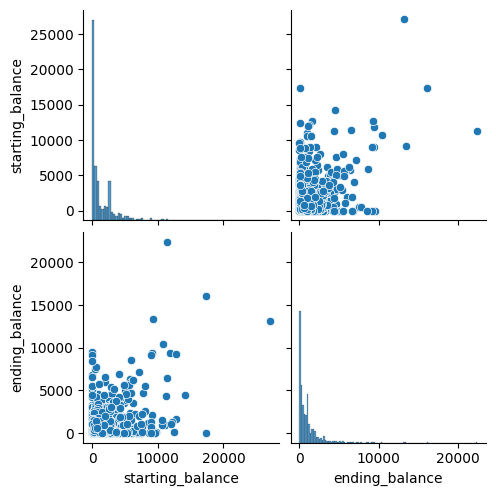

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(accounts_df[['starting_balance', 'ending_balance']])

## Checking Account DF Cleaning

In [104]:
checking_acct_df.head()

,cust_id,acct_nbr,minimum_balance,per_check_fee,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1362548,13625482,3000,0.00,Y,11.11.1986,NaN,6004.34,569.65
1,1362487,13624872,3000,0.00,Y,12.1.1995,NaN,2781.07,1401.21
2,1363017,13630172,3000,0.00,Y,19.3.1994,NaN,2694.91,147.15
3,1362752,13627522,100,0.15,Y,8.1.1994,NaN,487.69,3.76
4,1363282,13632822,100,0.15,Y,5.3.1988,NaN,133.90,84.18


In [105]:
checking_acct_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cust_id           520 non-null    int64  
 1   acct_nbr          520 non-null    int64  
 2   minimum_balance   520 non-null    int64  
 3   per_check_fee     520 non-null    float64
 4   account_active    520 non-null    object 
 5   acct_start_date   520 non-null    object 
 6   acct_end_date     52 non-null     object 
 7   starting_balance  520 non-null    float64
 8   ending_balance    520 non-null    float64
dtypes: float64(3), int64(3), object(3)
memory usage: 36.7+ KB
